In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
!pip install umap-learn
from umap import UMAP

ModuleNotFoundError: No module named 'umap'

In [ ]:
!pip install umap-learn
from umap import UMAP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
import torch
from torch.utils.data import DataLoader
import pickle

data = pd.read_pickle("balanced_vectorized.pkl").sample(frac=0.25)

In [ ]:
data.head()

,character,text,vector,goodness,priority,if_dead
970,tom,"Ah, Hagrid! The usual, I presume?\nBless my so...","[-0.0726442, 0.46006417, 0.18889366, 0.4122778...",Bad,2,Dead
1857,argus filch,"Anyone here, my sweet? Come on.\nWho's there?...","[0.2272414, -0.10367466, 0.10784524, 0.2942688...",Bad,2,Undead
1929,voldemort,It belongs to me! I killed Snape!,"[-0.24642326, 0.14405234, -0.25892344, -0.0855...",Bad,2,Dead
2498,mundungus fletcher,"Well, she's right there, in't she? Bleedin' bo...","[0.40461987, -0.16313602, 0.11044888, 0.221936...",Neutral,1,Else
211,rubeus hagrid,"Well, there's your money, Harry. Gringotts, t...","[-0.09787298, 0.39072463, -0.046341974, 0.0098...",Good,2,Undead


In [ ]:
umaped_vct = UMAP().fit_transform(vectors)

In [ ]:
umaped_vct2 = UMAP().fit_transform(vectors2)

Good = blue, Neutral = orange, Bad = green, Trash = red

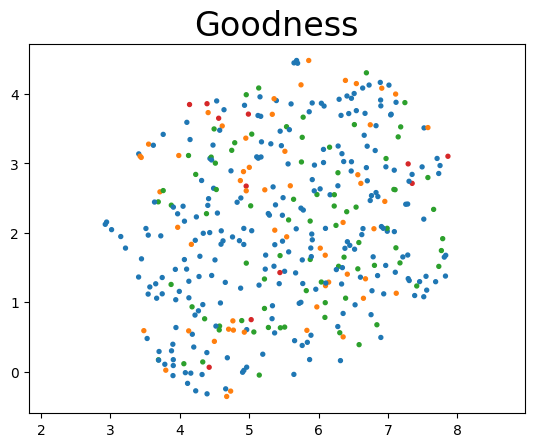

In [ ]:
ax = plt.scatter(
    umaped_vct[:, 0],
    umaped_vct[:, 1],
    c=[sns.color_palette()[x] for x in data.goodness.map({"Good":0, "Neutral":1, "Bad":2, "Trash":3})],
    s=8)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Goodness', fontsize=24);
# for i, x, y in zip(characters, umaped_vct[:, 0], umaped_vct[:, 1]):
#     plt.text(x, y, i)

0 = blue, 1 = orange, 2 = green, 3 = red

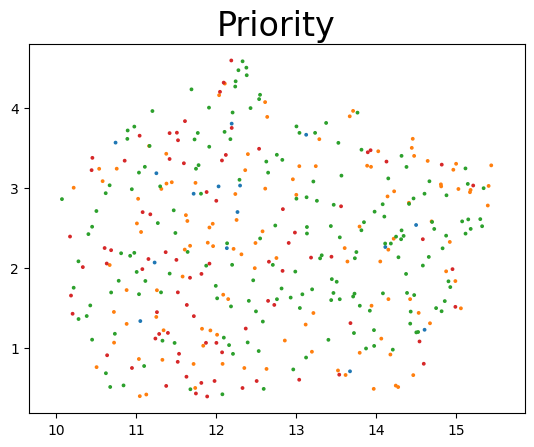

In [ ]:
ax2 = plt.scatter(
    umaped_vct[:, 0],
    umaped_vct[:, 1],
    c=[sns.color_palette()[x] for x in data.priority],
    s=3)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Priority', fontsize=24);
# for i, x, y in zip(priorities, umaped_vct[:, 0], umaped_vct[:, 1]):
#     plt.text(x, y, i)

Dead = blue, Undead = orange, Else = green, Trash = red

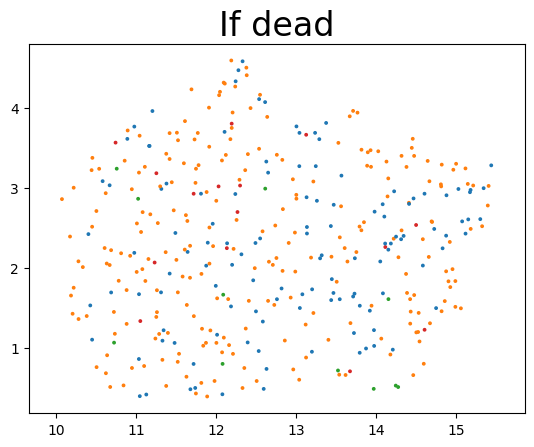

In [ ]:
ax3 = plt.scatter(
    umaped_vct[:, 0],
    umaped_vct[:, 1],
    c=[sns.color_palette()[x] for x in data.if_dead.map({"Dead":0, "Undead":1, "Else": 2, "Trash":3})],
    s=3)
plt.gca().set_aspect('equal', 'datalim')
plt.title('If dead', fontsize=24);
# for i, x, y in zip(status, umaped_vct[:, 0], umaped_vct[:, 1]):
#     plt.text(x, y, i)

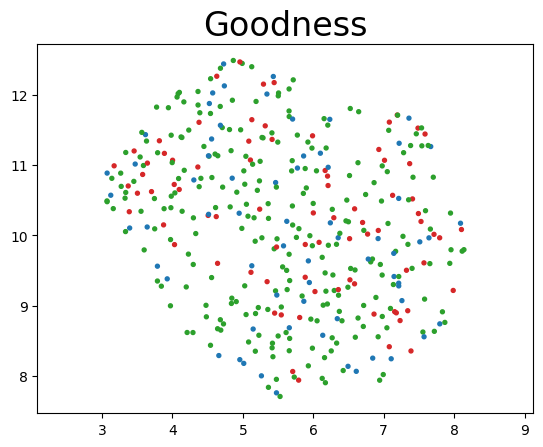

In [ ]:
ax = plt.scatter(
    umaped_vct[:, 0],
    umaped_vct[:, 1],
    c=[sns.color_palette()[x] for x in data.goodness.map({"Good":2, "Neutral":0, "Bad":3, "Trash":0})],
    s=8)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Goodness', fontsize=24);

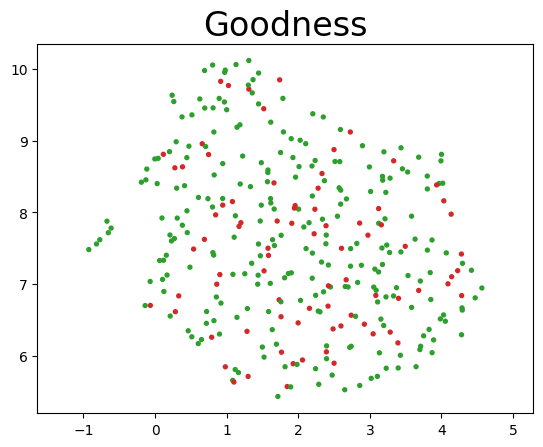

In [ ]:
ax = plt.scatter(
    umaped_vct2[:, 0],
    umaped_vct2[:, 1],
    c=[sns.color_palette()[x] for x in data.goodness.map({"Good":2, "Neutral":0, "Bad":3, "Trash":0})],
    s=8)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Goodness', fontsize=24);

## ДРУГИЕ ДАННЫЕ

In [ ]:
new_data = pd.read_pickle("gb_vectorized.pkl").sample(frac=0.25)

In [ ]:
new_data.head()

,character,text,goodness,priority,if_dead,gb_vector
1834,severus snape,"With you, of course, my Lord.\nMy Lord --\nTak...",Good,2,Dead,0.641;0.633;0.546;0.511;0.48;0.468;-0.245;-0.2...
2121,remus lupin,I'm very impressed. That suggests what you fea...,Good,2,Dead,1;1;1;1;1;1;1;1;1;1;1;1;0.895;0.875;0.85
2457,horace slughorn,"That's never unicorn hair, Hagrid?\nHagrid loo...",Neutral,1,Undead,0.75;0.714;0.667;0.667;0.629;0.616;0.591;0.553...
2489,corban yaxley,"No sign of him, my Lord.\nQuiet!",Bad,1,Undead,0.62;0.6;0.546;0.429;-0.245;0.131;-0.111;0.0;0...
2335,dolores umbridge,"So, turning a hallway into a swamp is funny, i...",Bad,2,Undead,-1;-1;-1;0.714;0.588;0.554;0.551;0.551;0.55;0....


In [ ]:
vectorz = [x.split(";") for x in new_data['gb_vector'].tolist()]

In [ ]:
umapedvct = UMAP().fit_transform(vectorz)

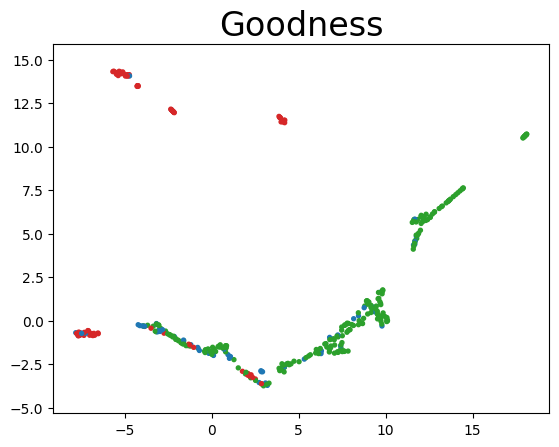

In [ ]:
ax = plt.scatter(
    umapedvct[:, 0],
    umapedvct[:, 1],
    c=[sns.color_palette()[x] for x in new_data.goodness.map({"Good":2, "Neutral":0, "Bad":3, "Trash":0})],
    s=8)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Goodness', fontsize=24);

##priority

In [ ]:
df = pd.read_pickle("gb_pr_vectorized.pkl").sample(frac=0.25)

In [ ]:
vectorz = [x.split(";") for x in df['pr_vector'].tolist()]

In [ ]:
umapedvct = UMAP().fit_transform(vectorz)

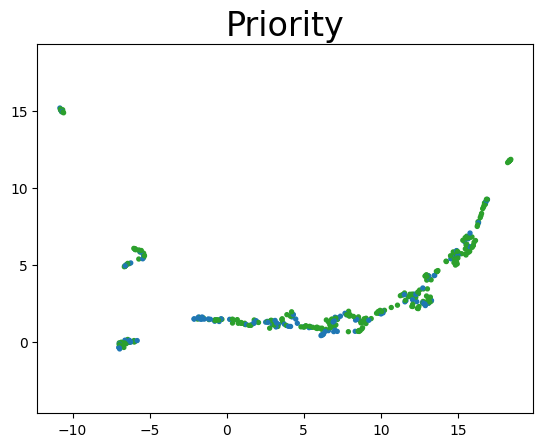

In [ ]:
ax = plt.scatter(
    umapedvct[:, 0],
    umapedvct[:, 1],
    c=[sns.color_palette()[x] for x in df.priority.map({2:2, 1:0, 3:2, 0:0})],
    s=8)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Priority', fontsize=24);